## 8.4 Simulating probabilistic events with Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import randint

The input to the randint function is the range of the sampling space starting from 0 (Python
start counting at zero). If we want to make a coin toss, where 0 represents tail and 1 represents
head, then we use randint like this.

In [2]:
one_coin_toss = randint(2)
one_coin_toss

0

If we want to make a dice roll, where the sampling space is {1; 2; 3; 4; 5; 6}

In [3]:
one_dice_roll = randint(6) + 1
one_dice_roll

2

We add one since randint(6) returns numbers from the sampling space f0; 1; 2; 3; 4; 5g. We
can get several random values by using the input size=, where randint then returns the values
in a NumPy Array. Here is an example of rolling ten dices.

In [4]:
ten_dice_rolls = randint(6, size=10) + 1
ten_dice_rolls

array([6, 2, 5, 6, 4, 3, 1, 3, 2, 3])

The input size= can also be a tuple, then randint returns a multi-dimensional Array.

In [5]:
three_rolls_with_two_dice = randint(6, size=(3,2)) + 1
three_rolls_with_two_dice

array([[5, 6],
       [6, 2],
       [1, 1]])

#### Random integers in a DataFrame
A key element of many board games is to roll two dice and sum their values. Make a histogram
of the probability of one million dice rolls. That would take a long time if we had to do it.
Luckily we can use the computer to simulate such an experiment using pseudo-random numbers.
First, let us look at just rolling two dice three times. Thus we need a total of ten dice rolls in a three by two table.

In [6]:
rolls = 3
dice = 2
dice_rolls = randint(6, size=(rolls, dice)) + 1
dice_rolls

array([[2, 4],
       [6, 5],
       [5, 3]])

Let us add random dice roles to a DataFrame.

In [7]:
df = pd.DataFrame(
    data=randint(6, size=(rolls, dice)) + 1
)
df

,0,1
0,5,5
1,3,1
2,1,2


We can now create series of the sums.

In [9]:
dice_sums = df.sum(axis='columns')
dice_sums

0    10
1     4
2     3
dtype: int64

We can do the same for ten thousand rolls of two dice. This time we will not print the result
(to save paper), but only show a histogram.

Text(0.5, 0, 'Sum of two dice rolls')

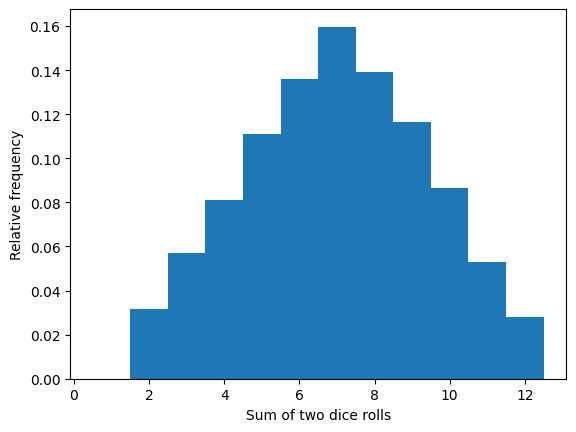

In [11]:
### Simulate rolls
df = pd.DataFrame(randint(6, size=(10000, 2)) + 1)
dice_sums = df.sum(axis='columns')

# plot histogram
dice_sums.plot.hist(
    bins = range(1,14), # Bins of width one_coin_toss
    density = True, # Plot the relative frequency (density)
    align='left' # Align numbers to the left of the bin
)
plt.ylabel('Relative frequency')
plt.xlabel('Sum of two dice rolls')

This result should be familiar to board game fans, i.e. we see that the most likely outcome is
that the sum of two dice is seven (1=6 ' 16:7% of the rolls).

## 8.4.1 Five dice rolled ten thousand times

Five dice are rolled in the game of Yatzy. Below we see how the histogram of the sums will
look if we roll five dice instead of two. We only have to change the above code a few places.

### Simulate rolls
df = pd.DataFrame(randint(6, size=(10000, 5)) +1) # 10000 rolls, 5 dices
dice_sums = df.sum(axis='columns')

dice_sums.plot.hist(
    bins=range(1, 32),
    density = True,
    align = 'left'
)

plt.ylabel('Relative frequency')
plt.xlabel('Sum of five dice rolls')

# Plot normal distribution on top
start, stop, step = 0, 32, 0.1
x = np.arange(start, stop, step)
mu = dice_sums.mean()
sigma = dice_sums.std()
pi = np.pi
N = np.sqrt(2*pi*sigma**2)
f = np.exp(-0.5*((x-mu))**2/sigma**2)/N
plt.plot(x, f, 'r')
print(f'Mean: {mu} Standard deviation: {sigma}')


The red line is the so-called normal distribution (with the same mean and standard deviation).
This result is an example of the general effect that distributions tend to look like the
normal distribution when adding many random events (known as the the central limit theoremThis distribution is typical for the distribution of continuous data. This distribution is
discussed later in the compendium.

## Excercise 8.7 Flipping Coin